<H1>INTRO </H1>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#dep info later
%matplotlib inline

In [14]:
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import SCORERS

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

In [16]:
df = pd.read_csv("cleandata.csv")
columns = list(df)
df['Position'] = pd.Categorical(df['Position'],
                                    categories=['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer',
                                                'Lab Lecturer'],
                                    ordered=True)
df["age_by_5"] = ((df["age"] -1)// 4) * 4+1
df["C"] = pd.to_numeric(df["C"], errors="coerce")
df["P"] = pd.to_numeric(df["P"], errors="coerce")
df["H"] = pd.to_numeric(df["H"], errors="coerce")
df["P5"] = pd.to_numeric(df["P5"], errors="coerce")
df["C5"] = pd.to_numeric(df["C5"], errors="coerce")
df["H5"] = pd.to_numeric(df["H5"], errors="coerce")
df["avgC"] = pd.to_numeric(df["avgC"], errors="coerce")
df["P5avg"] = df["P5"] /6
df["C5avg"] = df["C5"] /6
df["H5avg"] = df["H5"] /6
list_of_positions = ['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer', 'Lab Lecturer']
list_of_positions1 = ['Professor', 'Associate \n Professor', 'Assistant \n Professor', 'Lecturer', 'Lab Lecturer']
list_of_dept = df["Dept"].value_counts().index
df[["P","C","H","P5","C5","H5"]] = df[["P","C","H","P5","C5","H5"]].fillna(0)
# dep_categorization_by_region()





In [17]:
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


<H1>CLASSIFICATION </H1>

In [18]:
# prints recall presicion F1-score

def metrics_calculator(cm):
    for i in range (len(cm)):
            print(list_of_positions[i])
            TP = cm[i][i]
            R = TP/(sum(cm[i]))
            print(f"Recall = {R}")
            P = TP/(sum([cm[j][i] for j in range(5)]))
            print(f"Presicion = {P}")
            F = 2*P*R/(P + R)
            print(f"F1 score = {F}\n")
                    
        

<h4> OneHotEncoder <h4>

In [19]:
encoder= OneHotEncoder(sparse=False)
encoded_dept = encoder.fit_transform(df[["Dept"]])
encoded_dept = pd.DataFrame(encoded_dept)

X=pd.concat([df[["P","C","age"]],encoded_dept],axis= 1)

y=df["Position"]

In [20]:
from sklearn.preprocessing import FunctionTransformer


# quantile trasformer gia age cit pub, /5 to onehotencoding
def transformer_fun(X):
    trasformer   = QuantileTransformer(n_quantiles=15)
    X[:,0:3]  = trasformer.fit_transform(X[:,0:3])
    X[:,3:] = X[:,3:]/5
    return X
    
custom_transformer = FunctionTransformer(transformer_fun, validate=True)

X =custom_transformer.fit_transform(X)
X= pd.DataFrame(X)

x2=X



<H2>ALL DATA KNN</H2>

In [21]:

pipe = KNeighborsClassifier(n_neighbors=14)
scores = cross_val_score(pipe, X, y, cv=5).mean()
print(f"cv = 5, accuracy  = {scores}")




cv = 5, accuracy  = 0.6136968004371319


In [22]:
from sklearn.model_selection import LeaveOneOut

X=X
y = y

loo = LeaveOneOut()
cm = np.zeros((5,5))

accuracy = []
count =0
for train_index, test_index in loo.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        
        pipe.fit(X_train,y_train)
        pred = pipe.predict(X_test)
        accuracy.append(accuracy_score(y_test,pred))

        #temp one value cm 
        temp =np.array(confusion_matrix(y_test,pred,labels = list_of_positions))  
        # add temp to total cm 
        cm = np.add(temp, cm) 
print(f"leave one out, accuracy = {sum(accuracy)/906}")   


scores = cross_val_score(pipe, X, y, cv=5,scoring = 'accuracy').mean()


   

leave one out, accuracy = 0.6147902869757175


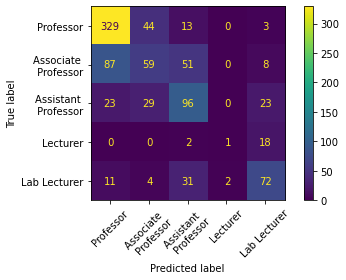

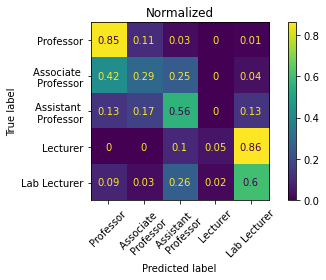

In [23]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list_of_positions1)

disp.plot(values_format='2g')

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.savefig("cm.png")

plt.show()


row_sum = np.sum(cm, axis=1)
cmn = cm/row_sum[:,None]
cmn =np.round(cmn, decimals= 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cmn,
                              display_labels=list_of_positions1)
disp.plot()
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.title("Normalized")
plt.tight_layout()
plt.savefig("cm_normalized.png")
plt.show()


# plt.show()

In [24]:
metrics_calculator(cm)    

Professor
Recall = 0.8457583547557841
Presicion = 0.7311111111111112
F1 score = 0.7842669845053636

Associate Professor
Recall = 0.28780487804878047
Presicion = 0.4338235294117647
F1 score = 0.34604105571847504

Assistant Professor
Recall = 0.5614035087719298
Presicion = 0.49740932642487046
F1 score = 0.5274725274725275

Lecturer
Recall = 0.047619047619047616
Presicion = 0.3333333333333333
F1 score = 0.08333333333333333

Lab Lecturer
Recall = 0.6
Presicion = 0.5806451612903226
F1 score = 0.5901639344262295



<H2>SMOTE DATA KNN </H2>

In [25]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 



sm = SMOTE(random_state=42)

X_smote,y_smote =sm.fit_resample(X, y)

#smoted one hot encoder reconstruction
array = X_smote.loc[[i for i in range(X_smote.shape[0])],[j for j in range(3,X_smote.shape[1])]].to_numpy()
max_index = np.argmax(array, axis=1)
array = np.zeros((array.shape[0],array.shape[1]))
for i in range(array.shape[0]):
    array[i][max_index[i]] = 0.2
X_smote.loc[[i for i in range(X_smote.shape[0])],[j for j in range(3,X_smote.shape[1])]] = array

In [27]:

loo = LeaveOneOut()

#arxikopoihsh confusion matrix
cm = np.zeros((5,5))


accuracy = []


for train_index, test_index in loo.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
       
        #prosartisi twn smote data sta train
        X_train = pd.concat([X_train,X_smote.loc[906:]] )
        y_train = pd.concat([y_train,y_smote.loc[906:]] )








        pipe.fit(X_train,y_train)
        pred = pipe.predict(X_test)
        accuracy.append(accuracy_score(y_test,pred))



        temp =np.array(confusion_matrix(y_test,pred,labels = list_of_positions))  
        cm = np.add(temp, cm) 
print(f"leave one out, accuracy = {sum(accuracy)/906}")
scores = cross_val_score(pipe, X, y, cv=5,scoring = 'accuracy').mean()

0.6192052980132451


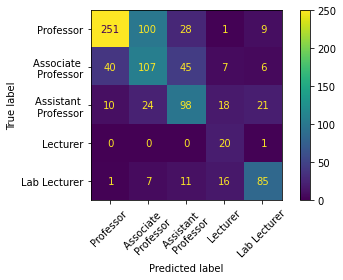

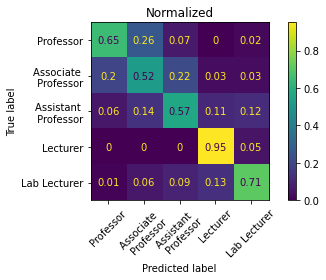

In [28]:



disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list_of_positions1)

disp.plot(values_format='2g')

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.tight_layout()
plt.savefig("cm_SMOTE.png")

plt.show()


row_sum = np.sum(cm, axis=1)
cmn = cm/row_sum[:,None]
cmn =np.round(cmn, decimals= 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cmn,
                              display_labels=list_of_positions1)
disp.plot()
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.title("Normalized")
plt.tight_layout()
plt.savefig("cm_normalized_SMOTE.png")
plt.show()


In [29]:
metrics_calculator(cm)  

Professor
Recall = 0.6452442159383034
Presicion = 0.8311258278145696
F1 score = 0.7264833574529668

Associate Professor
Recall = 0.5219512195121951
Presicion = 0.4495798319327731
F1 score = 0.48306997742663665

Assistant Professor
Recall = 0.5730994152046783
Presicion = 0.5384615384615384
F1 score = 0.5552407932011331

Lecturer
Recall = 0.9523809523809523
Presicion = 0.3225806451612903
F1 score = 0.4819277108433735

Lab Lecturer
Recall = 0.7083333333333334
Presicion = 0.6967213114754098
F1 score = 0.7024793388429753



<H2>ALL DATA SVM</H2>

In [33]:
X=x2
y=df["Position"]

grid = SVC()



grid.fit(X,y)
pred = grid.predict(X)



scores = cross_val_score(grid, X, y, cv=5).mean()
print(f"cv = 5, accuracy = {scores}")


cv = 5, accuracy = 0.6181288324934734


<H2>ΑLL DATA NAIVE </H2>

In [34]:
from sklearn.naive_bayes import GaussianNB




grid = GaussianNB()



grid.fit(X,y)
pred = grid.predict(X)



scores = cross_val_score(grid, X, y, cv=5).mean()
print(f"cv = 5, accuracy = {scores}")

cv = 5, accuracy = 0.1743731406714832


<H2>ΑLL DATA dt </H2>


In [35]:
from sklearn.tree import DecisionTreeClassifier



grid =DecisionTreeClassifier()


grid.fit(X,y)
pred = grid.predict(X)



scores = cross_val_score(grid, X, y, cv=5).mean()
print(f"cv = 5, accuracy = {scores}")

cv = 5, accuracy = 0.557416064598385
